In [0]:
import zipfile

In [0]:
with zipfile.ZipFile('digit-recognizer.zip') as z:
  z.extractall()

In [0]:
#first import pandas, then open the data
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head() #understand the format of the data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#reformat the data so the train_y is dropped
train_y = train['label']
train_X = train.drop('label', axis=1)

test_X = test

del train 
del test

In [0]:
#normalize the picel values of both datasets from [0-255] to [0, 1]
train_X = train_X / 255.0
test_X = test_X / 255.0


In [0]:
#reshape the data to 3d 28-28-1
train_X = train_X.values.reshape((-1, 28, 28, 1))
test_X = test_X.values.reshape((-1, 28, 28, 1))

In [8]:

import numpy as np
from keras.utils.np_utils import to_categorical

np.random.seed(2)

from sklearn.model_selection import train_test_split

train_y = to_categorical(train_y, num_classes = 10)

train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, random_state=2)

Using TensorFlow backend.


In [0]:
from keras import layers, models
from keras.layers import Conv2D, Dropout, Dense, MaxPool2D, Flatten
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy
from keras.optimizers import RMSprop

In [0]:


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [0]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
epochs = 6
batch_size = 32

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

In [0]:
datagen.fit(train_X)

In [16]:
history = model.fit_generator(
    datagen.flow(
        train_X, train_y, batch_size=batch_size
    ),
    epochs=epochs,
    callbacks=[learning_rate_reduction],
    steps_per_epoch=train_X.shape[0] // batch_size,
    verbose=1
)

Epoch 1/6
1181/1181 [==============================] - 14s 12ms/step - loss: 0.3166 - accuracy: 0.8998
Epoch 2/6
   7/1181 [..............................] - ETA: 26s - loss: 0.2251 - accuracy: 0.9330 

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1181/1181 [==============================] - 13s 11ms/step - loss: 0.1184 - accuracy: 0.9650
Epoch 3/6
1181/1181 [==============================] - 13s 11ms/step - loss: 0.0993 - accuracy: 0.9726
Epoch 4/6
1181/1181 [==============================] - 13s 11ms/step - loss: 0.0946 - accuracy: 0.9740
Epoch 5/6
1181/1181 [==============================] - 13s 11ms/step - loss: 0.0933 - accuracy: 0.9750
Epoch 6/6
1181/1181 [==============================] - 13s 11ms/step - loss: 0.0964 - accuracy: 0.9734


In [32]:
predictions = model.predict(test_X)
len(predictions)

28000

In [0]:
predicted_classes = []
for i in range(len(predictions + 1)):
  predicted_classes.append(np.argmax(predictions[i]))

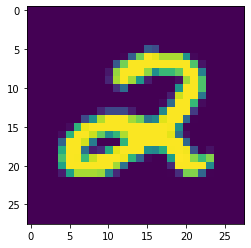

In [57]:
import matplotlib.pyplot as plt


plt.imshow(test_X[27999][:,:,0])
plt.show()

In [56]:
predicted_classes[27999]

2

In [0]:
dfdata = {'ImageId':[i + 1 for i in range(28000)],
          'Label':predicted_classes}

result = pd.DataFrame(dfdata, columns=['ImageId', 'Label'])

In [0]:
result.to_csv('2Submit.csv', index=False)

In [0]:
from google.colab import files

files.download('2Submit.csv')